In [1]:
import pandas as pd

In [99]:
#loading data mri_y_rsfmr_cor_gp_gp_reduced.csv
# X = pd.read_csv('../data/mri_y_rsfmr_cor_gp_gp_reduced.csv')
X =pd.read_csv(r'G:\\ABCD\\abcd-data-release-5.1\\core\\imaging\\mri_y_rsfmr_cor_gp_gp.csv')
# y = pd.read_csv('../data/latent_factors.csv')
y = pd.read_csv(r'G:\ABCD\\abcd-data-release-5.1\\core\\mental-health\\mh_p_cbcl.csv')
# only keep baseline_year_1_arm_1
X = X[X['eventname'] == '4_year_follow_up_y_arm_1']
y = y[y['eventname'] == '4_year_follow_up_y_arm_1']
y = y[['src_subject_id', 'eventname', 'cbcl_scr_dsm5_conduct_t', 'cbcl_scr_07_stress_t']]
# X = X.dropna(axis=1, how='all')
X = X.dropna(axis=0, how='any')
# y = y.dropna(axis=1, how='all')
y = y.dropna(axis=0, how='any')
# y = y.dropna()
# #only kept overlapping subjects in X and y
X = X[X['src_subject_id'].isin(y['src_subject_id'])]
y = y[y['src_subject_id'].isin(X['src_subject_id'])]

C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12744\1588334671.py:5: DtypeWarning: Columns (124,128,132,136,140,144,148,152,156,160,164,168,172,176,180,184,188,192,196,200) have mixed types. Specify dtype option on import or set low_memory=False.
  y = pd.read_csv(r'G:\ABCD\\abcd-data-release-5.1\\core\\mental-health\\mh_p_cbcl.csv')


In [100]:
X

,src_subject_id,eventname,rsfmri_c_ngd_ad_ngd_ad,rsfmri_c_ngd_ad_ngd_cgc,rsfmri_c_ngd_ad_ngd_ca,rsfmri_c_ngd_ad_ngd_dt,rsfmri_c_ngd_ad_ngd_dla,rsfmri_c_ngd_ad_ngd_fo,rsfmri_c_ngd_ad_ngd_n,rsfmri_c_ngd_ad_ngd_rspltp,...,rsfmri_c_ngd_vs_ngd_dt,rsfmri_c_ngd_vs_ngd_dla,rsfmri_c_ngd_vs_ngd_fo,rsfmri_c_ngd_vs_ngd_n,rsfmri_c_ngd_vs_ngd_rspltp,rsfmri_c_ngd_vs_ngd_sa,rsfmri_c_ngd_vs_ngd_smh,rsfmri_c_ngd_vs_ngd_smm,rsfmri_c_ngd_vs_ngd_vta,rsfmri_c_ngd_vs_ngd_vs
5,NDAR_INV00CY2MDM,4_year_follow_up_y_arm_1,0.491863,0.231676,-0.133458,-0.175459,-0.017222,-0.189228,-0.060414,-0.056363,...,-0.271758,0.106777,-0.161940,-0.074503,0.047546,-0.041986,0.092964,0.159948,-0.062141,0.496826
8,NDAR_INV00HEV6HB,4_year_follow_up_y_arm_1,0.211621,0.115973,0.119407,-0.006139,-0.020081,-0.020703,-0.003472,-0.065915,...,-0.097645,-0.024962,-0.104578,-0.053783,0.145464,-0.059406,-0.074687,-0.033824,-0.086857,0.360818
39,NDAR_INV01NAYMZH,4_year_follow_up_y_arm_1,0.365314,0.155351,-0.165999,-0.070606,-0.013435,-0.074057,0.004132,-0.032357,...,-0.168687,0.038786,-0.098744,-0.036186,0.040206,-0.084572,-0.155027,-0.039936,-0.063073,0.460205
42,NDAR_INV01RGTWD2,4_year_follow_up_y_arm_1,0.186895,0.057716,-0.101788,-0.006574,-0.087681,-0.029688,0.019225,-0.059638,...,-0.124047,0.037430,-0.148784,-0.040929,0.177560,-0.065398,-0.028188,0.097541,-0.089561,0.319876
49,NDAR_INV021403LF,4_year_follow_up_y_arm_1,0.280126,0.161641,-0.009787,0.003807,-0.099650,0.013710,0.007870,-0.104957,...,-0.178037,0.080947,-0.128718,-0.079597,0.304914,-0.137064,-0.095106,-0.011038,-0.177377,0.474348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22114,NDAR_INVZZL0VA2F,4_year_follow_up_y_arm_1,0.307540,0.185599,0.024785,-0.071415,0.043384,-0.028686,-0.027020,-0.082350,...,-0.165386,-0.061804,-0.137330,-0.032468,0.008103,-0.151970,-0.111164,0.066763,-0.093329,0.510962
22119,NDAR_INVZZNX6W2P,4_year_follow_up_y_arm_1,0.327723,0.138847,0.031929,-0.054408,0.042194,-0.068000,0.000947,-0.042702,...,-0.142195,0.009632,-0.083846,-0.059855,0.211523,0.030507,-0.113119,-0.007221,-0.105764,0.515016
22122,NDAR_INVZZPKBDAC,4_year_follow_up_y_arm_1,0.364109,0.190308,0.003464,-0.044734,-0.043994,-0.008180,0.002608,-0.142847,...,-0.205276,-0.013448,-0.110353,-0.048239,0.112181,0.014052,-0.082620,0.016966,-0.082839,0.514209
22126,NDAR_INVZZZNB0XC,4_year_follow_up_y_arm_1,0.363400,0.090317,-0.231313,-0.150431,-0.010488,-0.140455,-0.063671,0.018483,...,-0.185407,0.010418,-0.216916,-0.039357,0.189046,-0.069717,0.174555,0.119748,-0.010881,0.392232


In [101]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 计算距离所需
# from sklearn.metrics import pairwise_distances
# # Adjacency对象来自 naturalistic-data / nltools 库
# from nltools.data import Adjacency

# X = X.iloc[:,1:]
# # y = y.iloc[:,1:]
# # cbcl_scr_07_stress_t
# y = y['cbcl_scr_07_stress_t'].to_numpy()

# # --------------------------
# # 1) 对 X 计算距离矩阵与相似度矩阵
# # --------------------------
# # X_dist.shape -> (10000, 10000) (可能非常大)
# X_dist = pairwise_distances(X, metric='euclidean')
# X_adj = Adjacency(X_dist, matrix_type='distance')
# X_sim = X_adj.distance_to_similarity()  # 转换为相似度

# # --------------------------
# # 2) 对 y 计算距离矩阵与相似度矩阵
# # --------------------------
# y_dist = pairwise_distances(y, metric='euclidean')
# y_adj = Adjacency(y_dist, matrix_type='distance')
# y_sim = y_adj.distance_to_similarity()

# # --------------------------
# # 3) 可视化 (小心内存与分辨率)
# # --------------------------
# # 如果直接 plot 全 10000x10000，通常非常大且难以可视化
# # 示例中仅演示如何调用 .plot()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# # X 的相似度矩阵
# X_sim.plot(axes=ax1)
# ax1.set_title("X similarity matrix", fontsize=14)

# # y 的相似度矩阵
# y_sim.plot(axes=ax2)
# ax2.set_title("y similarity matrix", fontsize=14)

# plt.tight_layout()
# plt.show()


2

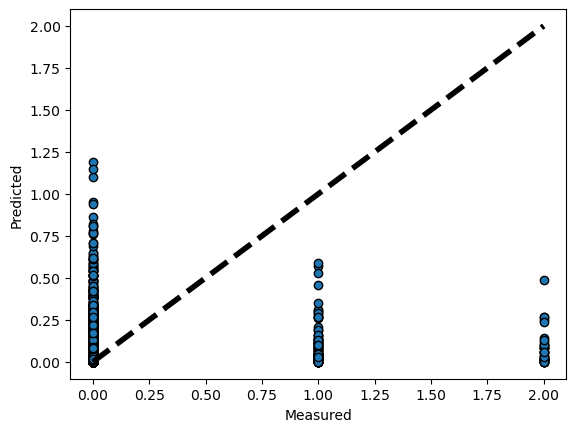

In [106]:
# linear regression from X to y
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X = X.iloc[:,2:]
# y = y.iloc[:,2:]
y = y['cbcl_scr_07_stress_t'].to_numpy()
conditions = [y < 65, (y >= 65) & (y <= 69), y > 70]
choices = [0, 1, 2]

y = np.select(conditions, choices)

#fitting the model
model = RandomForestRegressor(n_estimators=100)
# model = LinearRegression()
predicted = cross_val_predict(model, X, y, cv=5)

#plotting the results
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [91]:
#calculating the R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y, predicted)
r2


-0.04481447923344306

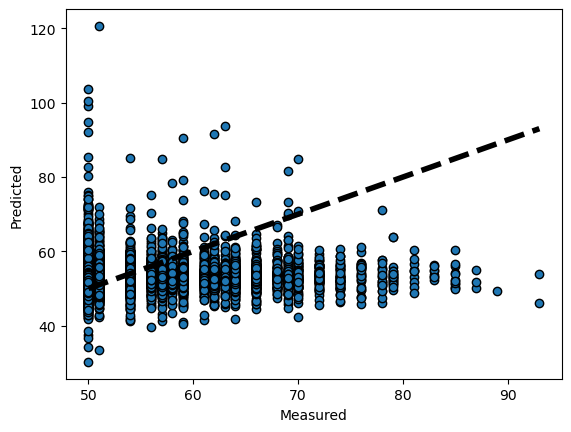

-0.3614097412430777

In [47]:
#try nn
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
predicted = cross_val_predict(model, X, y, cv=5)

#plotting the results
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#calculating the R2 score
r2 = r2_score(y, predicted)
r2


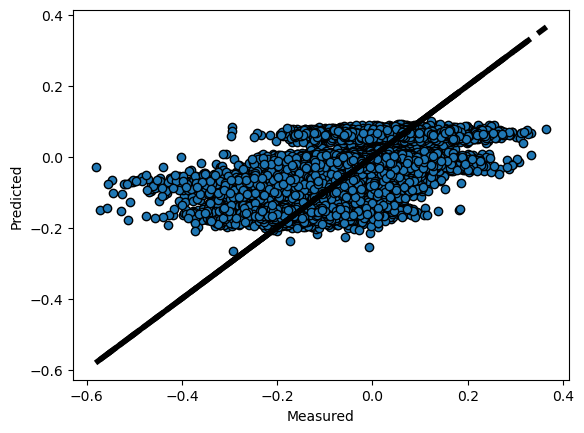

-0.004103643859076511

In [ ]:
#try random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
predicted = cross_val_predict(model, X, y, cv=5)

#plotting the results
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#calculating the R2 score
r2 = r2_score(y, predicted)
r2 

In [9]:
X = X.iloc[:,1:]
y = y.iloc[:,1:]

In [19]:
y.shape

(10669, 5)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# ============ 数据划分（训练 + 验证 + 测试） ============ #
from sklearn.model_selection import train_test_split

# 拆分为 train(64%) + val(16%) + test(20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_pca_after, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# 转为 Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 定义模型
class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, negative_slope=0.01):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)``
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.act1 = nn.ReLU(negative_slope)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.act2 = nn.ReLU(negative_slope)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = self.act1(self.bn1(self.fc1(x)))
        x = self.act2(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x


# ============ DataLoader ============ #
from torch.utils.data import TensorDataset, DataLoader

batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)

# ============ 模型定义 & 训练 ============ #
model = ThreeLayerNN(input_dim=X.shape[1], hidden_dim1=100, hidden_dim2=100, output_dim=y.shape[1])
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.001)

epochs = 600
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)

    print(f"Epoch [{epoch+1}/{epochs}]  Train Loss: {avg_train_loss:.4f}   Val Loss: {avg_val_loss:.4f}")
#预测测试集
model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor).numpy()

# 画图
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predicted, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Predicted vs Measured")
plt.grid(True)
plt.show()

# 计算 R² 分数
print("R² score:", r2_score(y_test, predicted))

ValueError: Found input variables with inconsistent numbers of samples: [8459, 10669]

Original shape: (10669, 91)
After outlier removal: (8459, 91)


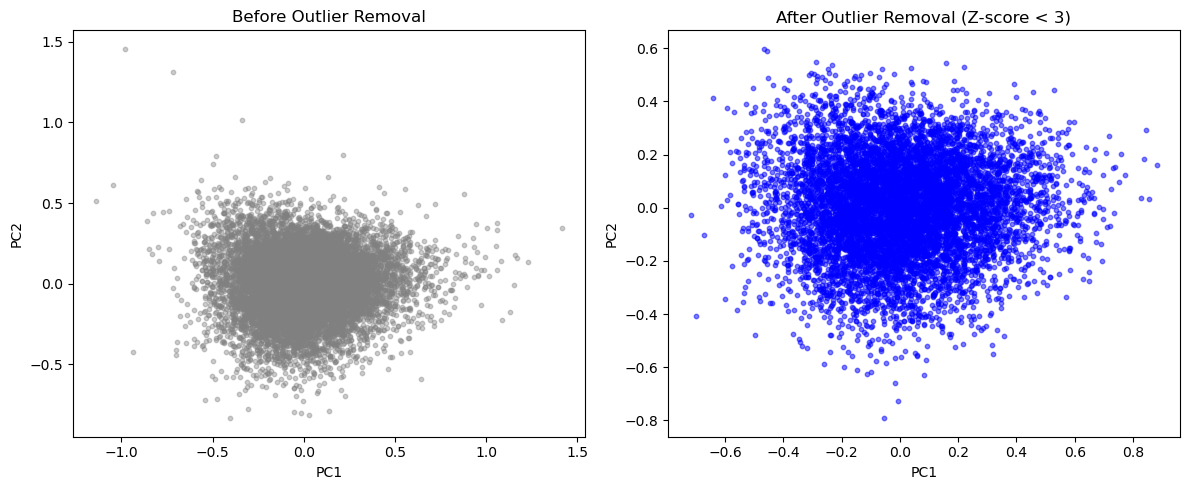

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Suppose you already have:
# X: shape (10000, 92), can be a DataFrame or ndarray
# y: shape (10000,) or (10000, 1)

# If X is ndarray, convert to DataFrame for convenience
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

# ✅ 1. Z-score based outlier removal
z_scores = np.abs(zscore(X))
mask = (z_scores < 3).all(axis=1)  # Keep only rows with all features < ±3 std

X_clean = X[mask]
y_clean = y[mask]

print(f"Original shape: {X.shape}")
print(f"After outlier removal: {X_clean.shape}")

# ✅ 2. PCA projection for 2D visualization (Before vs After)
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X)
X_pca_after = pca.transform(X_clean)

# ✅ 3. Plot before and after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], c='grey', alpha=0.4, s=10)
plt.title("Before Outlier Removal")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca_after[:, 0], X_pca_after[:, 1], c='blue', alpha=0.5, s=10)
plt.title("After Outlier Removal (Z-score < 3)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()


Epoch [1/600], Loss: 31.9767
Epoch [2/600], Loss: 12.4389
Epoch [3/600], Loss: 8.5774
Epoch [4/600], Loss: 6.5728
Epoch [5/600], Loss: 5.4373
Epoch [6/600], Loss: 4.6471
Epoch [7/600], Loss: 4.0968
Epoch [8/600], Loss: 3.7447
Epoch [9/600], Loss: 3.5073
Epoch [10/600], Loss: 3.3389
Epoch [11/600], Loss: 3.2144
Epoch [12/600], Loss: 3.1234
Epoch [13/600], Loss: 3.0301
Epoch [14/600], Loss: 2.9892
Epoch [15/600], Loss: 2.9450
Epoch [16/600], Loss: 2.9254
Epoch [17/600], Loss: 2.8796
Epoch [18/600], Loss: 2.8663
Epoch [19/600], Loss: 2.8363
Epoch [20/600], Loss: 2.8310
Epoch [21/600], Loss: 2.8036
Epoch [22/600], Loss: 2.7917
Epoch [23/600], Loss: 2.7825
Epoch [24/600], Loss: 2.7628
Epoch [25/600], Loss: 2.7474
Epoch [26/600], Loss: 2.7443
Epoch [27/600], Loss: 2.7308
Epoch [28/600], Loss: 2.7166
Epoch [29/600], Loss: 2.7056
Epoch [30/600], Loss: 2.7062
Epoch [31/600], Loss: 2.6902
Epoch [32/600], Loss: 2.6827
Epoch [33/600], Loss: 2.6724
Epoch [34/600], Loss: 2.6600
Epoch [35/600], Loss:

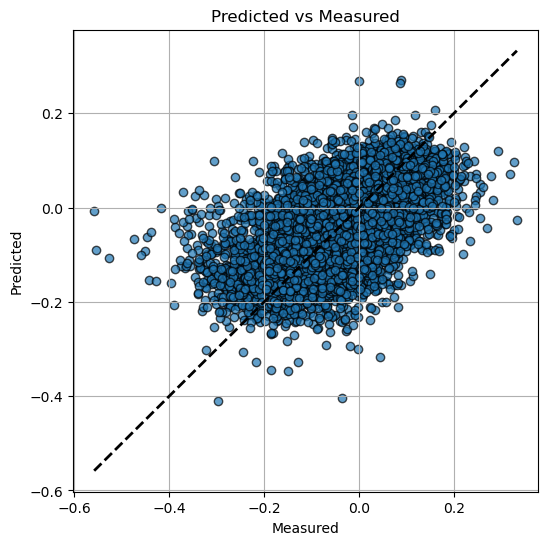

R² score: -0.2569887383297778


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# 假设你已有 numpy 格式的 X, y（例如 X.shape = (n_samples, n_features)）
# 示例：
# X = np.random.rand(1000, 100)
# y = np.random.rand(1000, 1)
# X = X.to_numpy()
# y = y.to_numpy()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转为 PyTorch Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 定义模型
class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, negative_slope=0.01):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.act1 = nn.LeakyReLU(negative_slope)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.act2 = nn.LeakyReLU(negative_slope)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = self.act1(self.bn1(self.fc1(x)))
        x = self.act2(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

# 初始化模型
model = ThreeLayerNN(input_dim=X.shape[1], hidden_dim1=100, hidden_dim2=100, output_dim=y.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


batch_size = 16
# 创建训练集的 DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 训练模型
epochs = 600
# Training loop with mini-batches
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    # if (epoch+1) % 10 == 0:
    #     print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")
# 预测测试集
model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor).numpy()

# 画图
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predicted, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Predicted vs Measured")
plt.grid(True)
plt.show()

# 计算 R² 分数
print("R² score:", r2_score(y_test, predicted))
